In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the iris data

In [2]:
iris = load_iris() 

In [3]:
X = iris.data
y = iris.target

df = pd.DataFrame(X)
y = pd.Series(y)
X = df[[0, 2]]

Plot of the two features

Text(0, 0.5, 'Petal Length')

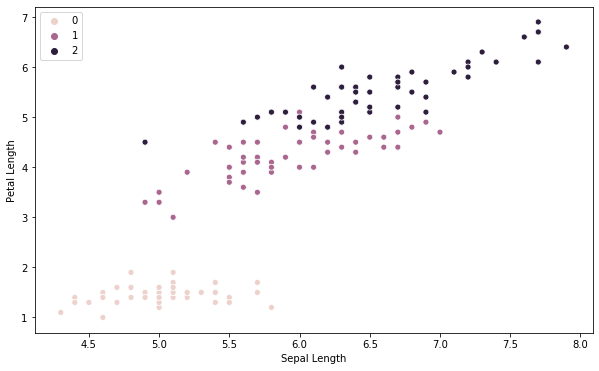

In [4]:
plt.figure(figsize = (10,6))
sns.scatterplot(X.loc[:, 0], X.loc[:, 2], hue=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

In [5]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

### Working with the linear kernel

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.

In [6]:
C_range = 10. ** np.arange(-3, 5)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv = 3, scoring='accuracy')

In [7]:
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.320000,0.000000,{'C': 0.001}
1,0.886667,0.009428,{'C': 0.01}
2,0.940000,0.016330,{'C': 0.1}
3,0.953333,0.009428,{'C': 1.0}
4,0.946667,0.024944,{'C': 10.0}
5,0.953333,0.024944,{'C': 100.0}
6,0.946667,0.024944,{'C': 1000.0}
7,0.946667,0.024944,{'C': 10000.0}


In [8]:
print(grid.best_score_)
print(grid.best_params_)

0.9533333333333333
{'C': 1.0}


## Working with the rbf kernel
We can only use the gamma parameter while working with rbf kernel

The 'gamma' parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

In [9]:
C_range = 10. ** np.arange(-3, 5)
gamma_range = 10. ** np.arange(-5, 4)

In [10]:
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(), param_grid, cv = 3, scoring='accuracy')
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.320000,0.000000,"{'C': 0.001, 'gamma': 1e-05}"
1,0.320000,0.000000,"{'C': 0.001, 'gamma': 0.0001}"
2,0.320000,0.000000,"{'C': 0.001, 'gamma': 0.001}"
3,0.320000,0.000000,"{'C': 0.001, 'gamma': 0.01}"
4,0.320000,0.000000,"{'C': 0.001, 'gamma': 0.1}"
...,...,...,...
67,0.940000,0.016330,"{'C': 10000.0, 'gamma': 0.1}"
68,0.953333,0.037712,"{'C': 10000.0, 'gamma': 1.0}"
69,0.940000,0.032660,"{'C': 10000.0, 'gamma': 10.0}"
70,0.800000,0.016330,"{'C': 10000.0, 'gamma': 100.0}"


In [11]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'C': 100.0, 'gamma': 0.1}
